In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("webmd.csv")

In [3]:
df.head(2)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1


In [4]:
df['rating'] = ((df['EaseofUse'] + df['Effectiveness'] + df['Satisfaction']) / 3).astype(int)

In [5]:
df.head(2)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,rating
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,5
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,5


In [6]:
df.nunique()

Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250167
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
rating                7
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
 12  rating         362806 non-null  int32 
dtypes: int32(1), int64(5), object(7)
memory usage: 34.6+ MB


In [8]:
sum(df.isnull()['Reviews'])/len(df)

0.0001019828779016885

In [9]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362769 entries, 0 to 362768
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   index          362769 non-null  int64 
 1   Age            362769 non-null  object
 2   Condition      362769 non-null  object
 3   Date           362769 non-null  object
 4   Drug           362769 non-null  object
 5   DrugId         362769 non-null  int64 
 6   EaseofUse      362769 non-null  int64 
 7   Effectiveness  362769 non-null  int64 
 8   Reviews        362769 non-null  object
 9   Satisfaction   362769 non-null  int64 
 10  Sex            362769 non-null  object
 11  Sides          362769 non-null  object
 12  UsefulCount    362769 non-null  int64 
 13  rating         362769 non-null  int32 
dtypes: int32(1), int64(6), object(7)
memory usage: 37.4+ MB


In [11]:
conditionGroupDF = df.groupby(['Condition'])['Drug'].nunique().sort_values(ascending=False)
conditionGroupDF[:20]

Condition
Other                                         4469
Osteoporosis                                   229
Birth Control                                  204
Pain                                           202
High Blood Pressure                            200
Acne                                           197
Painful Periods                                161
Rheumatoid Arthritis                           148
Cough                                          137
Cold Symptoms                                  129
Inflammation of the Nose due to an Allergy     122
Type 2 Diabetes Mellitus                       117
Abnormally Long or Heavy Periods               111
Incomplete or Infrequent Bowel Movements       109
Stuffy Nose                                    108
Disease of Ovaries with Cysts                  103
Allergic Conjunctivitis                        102
Migraine Headache                               95
Atopic Dermatitis                               92
"Change of Life" Sign

In [12]:
len(df[df["Condition"].str.contains("Change of Life",na=False)]['Condition'])

2569

In [13]:
x = df[df["Condition"].str.contains("Change of Life",na=False)].index
df = df.drop(df.index[x], axis=0)
len(df)

360200

In [14]:
df = df[df["EaseofUse"] < 6]

In [15]:
df.nunique()

index            360197
Age                  12
Condition          1804
Date               4524
Drug               7089
DrugId             6568
EaseofUse             5
Effectiveness         5
Reviews          248164
Satisfaction          5
Sex                   3
Sides              1651
UsefulCount         148
rating                5
dtype: int64

In [16]:
A=1
B=3
a=1
b=5
df['sentiment'] = ((B-A)*(df['rating']-a)/(b-a)+A).astype(int)

In [17]:
df.drop(['index','DrugId'],inplace=True,axis=1)

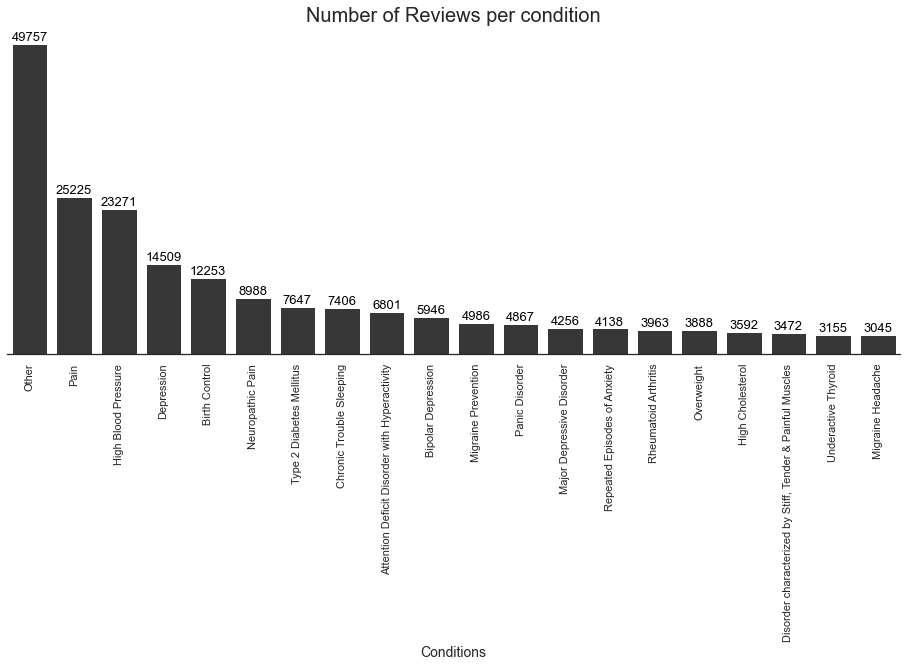

In [18]:
conditionDF = pd.DataFrame(df.groupby(['Condition']).count().sort_values(by='UsefulCount',ascending=False)['UsefulCount'])[:20].reset_index()

plt.figure(figsize=(16,6))
sns.set(style="white")
g= sns.barplot(x="Condition",y="UsefulCount",data=conditionDF,color=(0.21569, 0.21569 ,0.21569))

g.set_xticklabels(rotation=90,labels=conditionDF['Condition'])
g.set(yticklabels=[])
g.set_ylabel('')
g.axes.set_title("Number of Reviews per condition",fontsize=20)
g.set_xlabel('Conditions',fontsize=14)
sns.despine(left=True)

locs, labels = plt.xticks() # get the current tick locations and labels

for loc, label in zip(locs, labels):
    count = conditionDF.iloc[loc].UsefulCount
    plt.text(loc, count-8, '{:0.0f}'.format(count), ha='center', va='bottom' ,color = 'black',size=13)

In [19]:
conditionDF.head()

,Condition,UsefulCount
0,Other,49757
1,Pain,25225
2,High Blood Pressure,23271
3,Depression,14509
4,Birth Control,12253


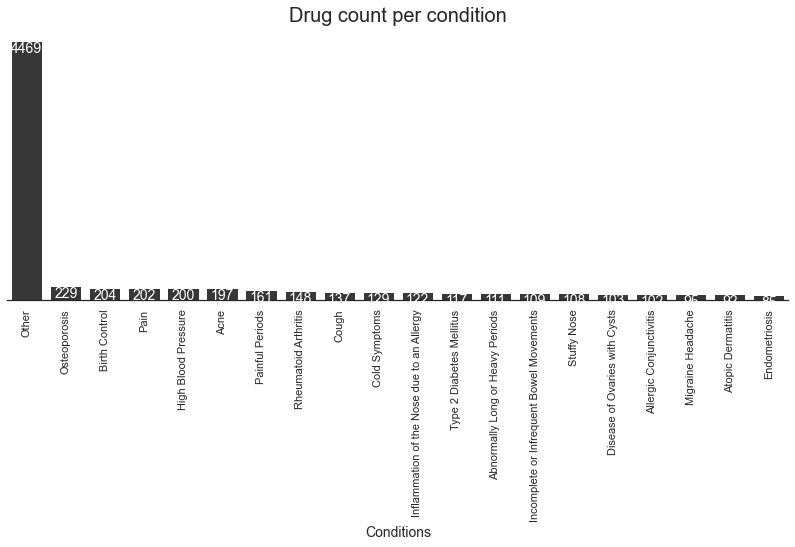

In [20]:
conditionGroupDF = pd.DataFrame(df.groupby(['Condition'])['Drug'].nunique().sort_values(ascending=False)[:20]).reset_index()

plt.figure(figsize=(14,5))
sns.set(style="white")

g = sns.barplot(y=conditionGroupDF['Drug'],x=conditionGroupDF['Condition'],color=(0.21569, 0.21569 ,0.21569))

g.set_xticklabels(rotation=90,labels=conditionGroupDF['Condition'])
g.set(yticklabels=[])
g.set_ylabel('')
g.axes.set_title("Drug count per condition",fontsize=20)
g.set_xlabel('Conditions',fontsize=14)
sns.despine(left=True)

locs, labels = plt.xticks() # get the current tick locations and labels

for loc, label in zip(locs, labels):
    count = conditionGroupDF.iloc[loc].Drug
    plt.text(loc, count-8, '{:0.0f}'.format(count), ha = 'center',va='top', color = 'w',size=14)

C:\Users\tejal\anaconda3\envs\py33\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\tejal\anaconda3\envs\py33\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tejal\anaconda3\envs\py33\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error 

<AxesSubplot:xlabel='sentiment'>

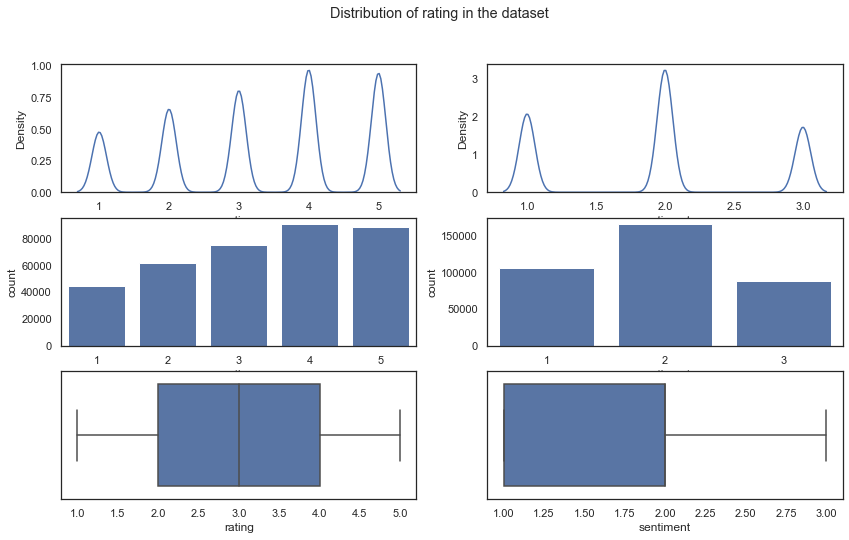

In [21]:
f, axes = plt.subplots(3, 2,figsize=(14, 8))
sns.countplot(df['rating'],color=sns.color_palette()[0],ax=axes[1][0])
sns.distplot(df['rating'], hist=False,ax=axes[0][0])
sns.boxplot(df['rating'],ax=axes[2][0])
g.set_ylabel('Count',fontsize=12)
plt.suptitle("Distribution of rating in the dataset");

sns.countplot(df['sentiment'],color=sns.color_palette()[0],ax=axes[1][1])
sns.distplot(df['sentiment'], hist=False,ax=axes[0][1])
sns.boxplot(df['sentiment'],ax=axes[2][1])

In [22]:
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize 

C:\Users\tejal\anaconda3\envs\py33\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Num of words in each review')

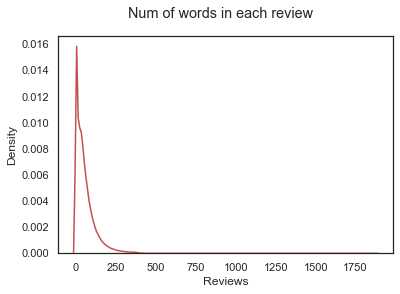

In [23]:
num_words = df['Reviews'].apply(lambda x:len(x.split(' ')))
sns.distplot(num_words, hist = False, kde = True, color=sns.color_palette()[3])
plt.suptitle("Num of words in each review")

Text(0.5, 0.98, 'Top 20 unigram in review before removing stop words')

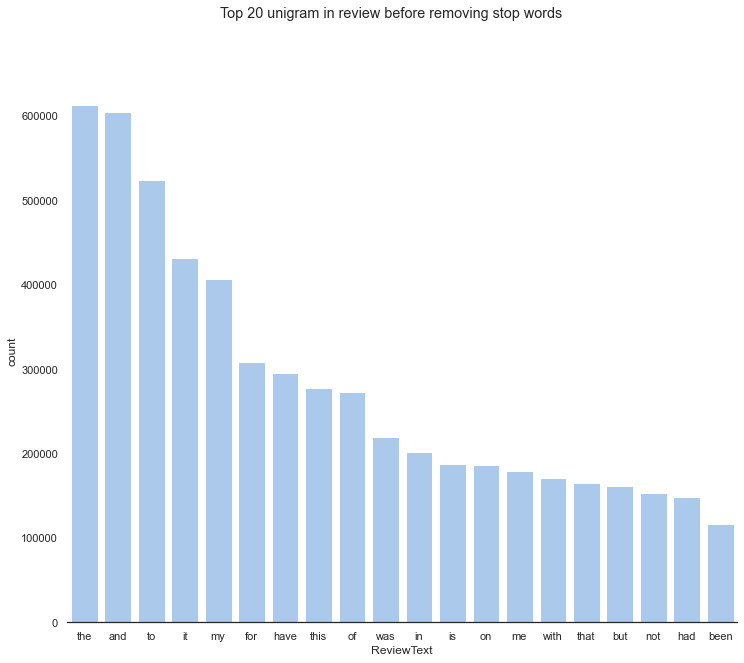

In [24]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['Reviews'], 20)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])


f, ax = plt.subplots(figsize=(12, 10))
sns.set_color_codes("pastel")
sns.barplot(x="ReviewText", y="count", data=df1, color="b")
sns.despine(left = True)
plt.suptitle("Top 20 unigram in review before removing stop words")

Text(0.5, 0.98, 'Top 20 bigrams in review before removing stop words')

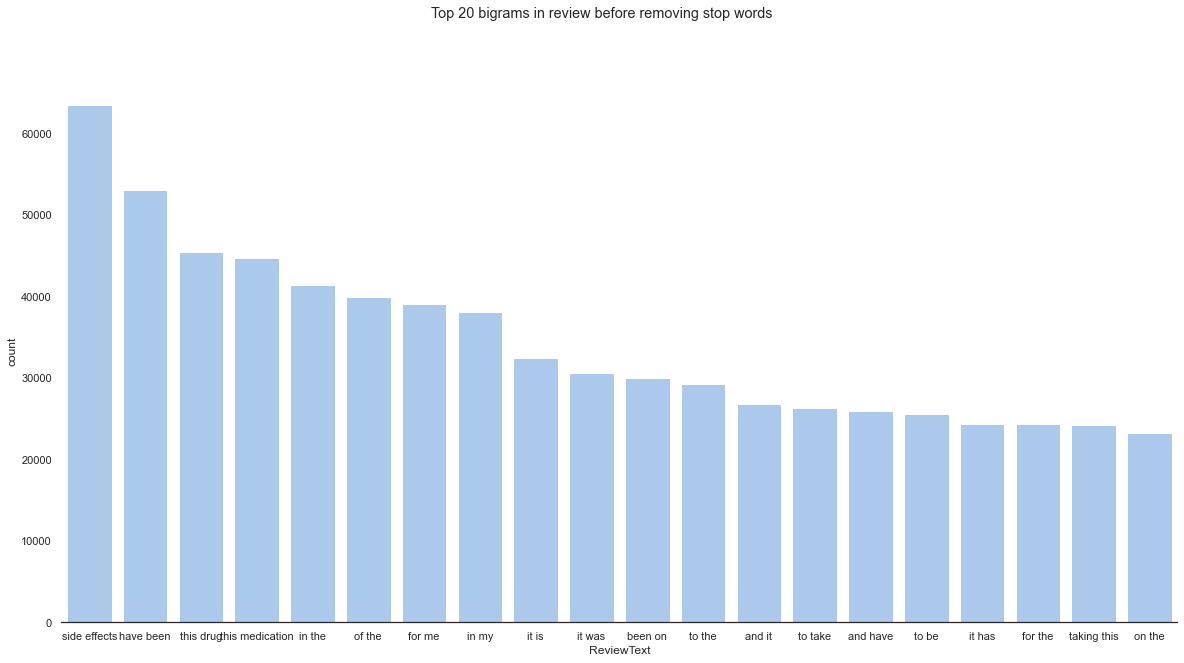

In [25]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['Reviews'], 20)
df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])


f, ax = plt.subplots(figsize=(20, 10))
sns.set_color_codes("pastel")
sns.barplot(x="ReviewText", y="count", data=df3, color="b")
sns.despine(left = True)
plt.suptitle("Top 20 bigrams in review before removing stop words")

Text(0.5, 0.98, 'Top 20 unigram in review after removing stop words')

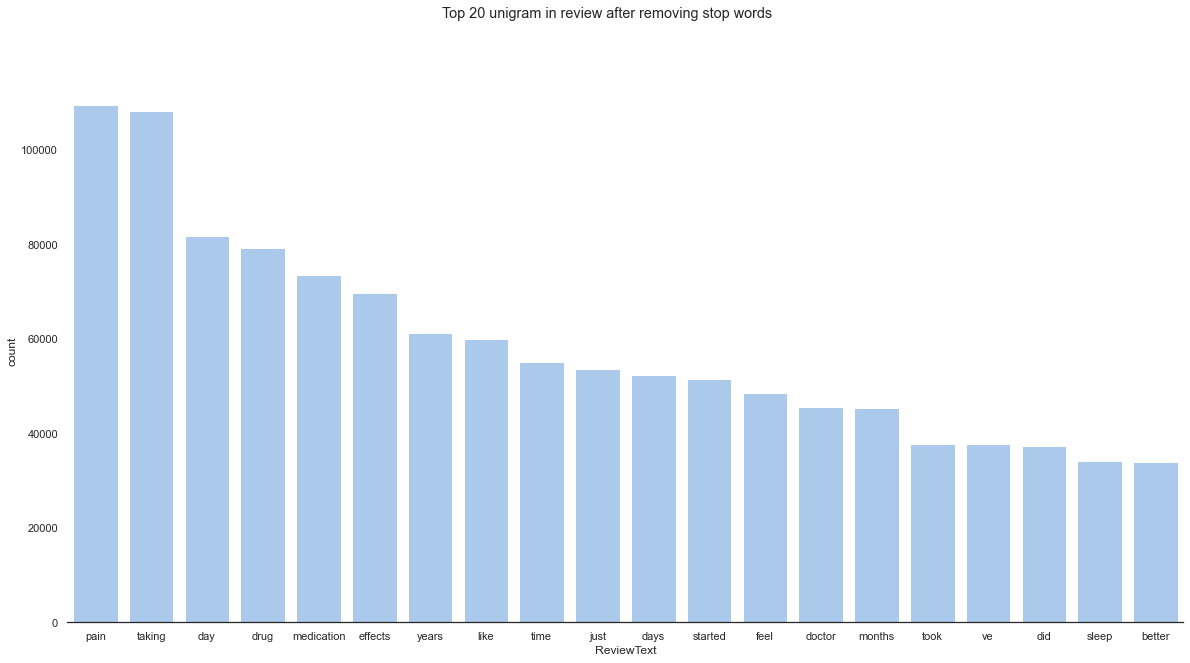

In [26]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['Reviews'], 20)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])


f, ax = plt.subplots(figsize=(20, 10))
sns.set_color_codes("pastel")
sns.barplot(x="ReviewText", y="count", data=df4, color="b")
sns.despine(left = True)
plt.suptitle("Top 20 unigram in review after removing stop words")

Text(0.5, 0.98, 'Top 20 bigrams in review after removing stop words')

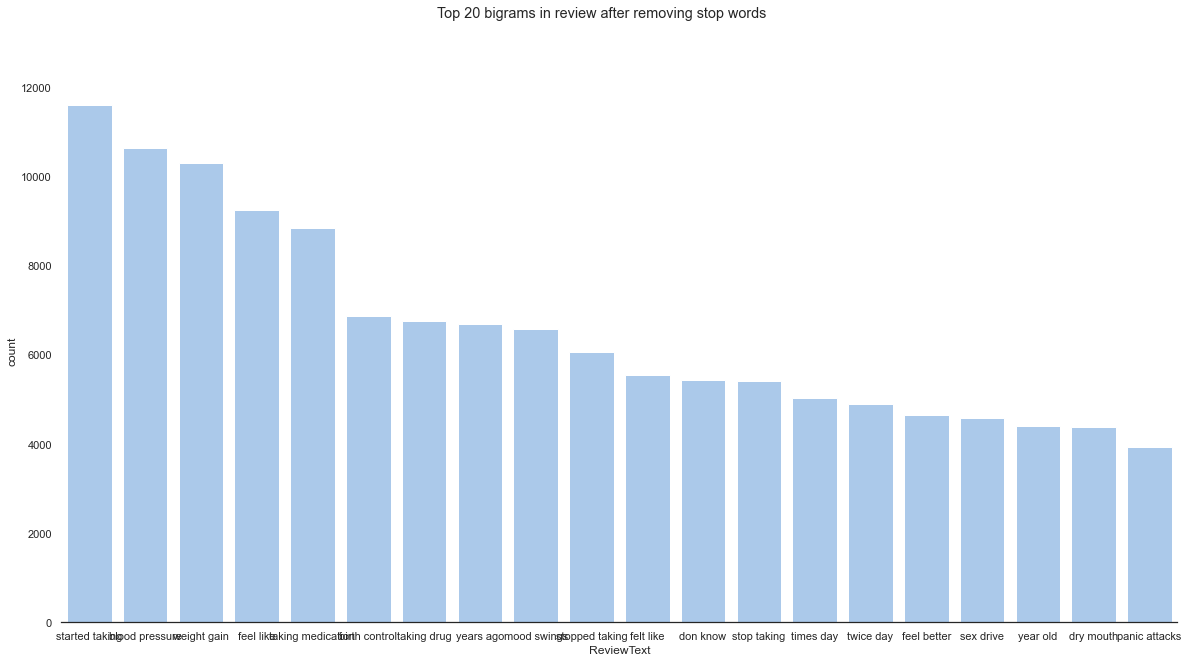

In [27]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['Reviews'], 20)
df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])


f, ax = plt.subplots(figsize=(20, 10))
sns.set_color_codes("pastel")
sns.barplot(x="ReviewText", y="count", data=df3, color="b")
sns.despine(left = True)
plt.suptitle("Top 20 bigrams in review after removing stop words")

In [28]:
import en_core_web_sm
nlp = en_core_web_sm.load()

C:\Users\tejal\anaconda3\envs\py33\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.4). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [29]:
from pycontractions import Contractions
cont = Contractions(api_key="glove-twitter-100")

In [30]:
import re
def sent_expander(sentence):
    sentence = re.sub("&#039;","'",sentence)
    sentence = list(cont.expand_texts([sentence],precise = True))[0]
    return sentence
df.Reviews.apply(lambda x: sent_expander(x))

[==================================================] 100.0% 387.1/387.1MB downloaded


0         I am a retired physician and of all the meds I...
1         cleared me right up even with my throat hurtin...
2         why did my PTINR go from a normal of 2.5 to ov...
3                             FALLING AND do not REALISE IT
4         My grandfather was prescribed this medication ...
                                ...                        
362764    I took the whole 12 weeks.I could have stopped...
362765    My dad strated taking Chantix about 1 month ag...
362766    As long as I was on chantix, I did not smoke. ...
362767    Started this medication Oct 5th 2008. have not...
362768    One year ago, I tried Chantix and had to stop ...
Name: Reviews, Length: 360197, dtype: object

In [31]:
df.to_csv("updated_drug_train.csv",index = False)

In [32]:
df = pd.read_csv("updated_drug_train.csv")
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
def spacy_tokenizer(sentence):
    tokens =[]
    sentence = nlp(sentence)
    for s in sentence:
        lemma = nlp.vocab[s.text]
        if lemma.is_stop == False:
            tokens.append(s)
    return tokens

In [34]:
df.loc[df['rating'] == 1, 'senti_new'] = 'Negative'
df.loc[df['rating'] == 5, 'senti_new'] = 'Positive'
df.loc[(df['rating'] > 1) & (df['rating'] <= 4), 'senti_new'] = 'Neutral'
X = df['Reviews']
y = df['senti_new']

(array([ 88223.,      0.,      0.,      0.,      0., 227394.,      0.,
             0.,      0.,  44580.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

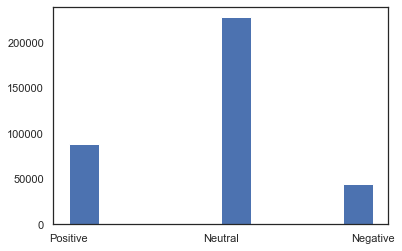

In [35]:
plt.hist(df['senti_new'])

In [36]:
# Split the data into training, testing and validation 
from sklearn.model_selection import train_test_split

X_train, X_validation_test, y_train,y_validation_test = train_test_split(X,y,train_size = 0.6)

X_validation, X_test, y_validation,y_test = train_test_split(X_validation_test,y_validation_test,train_size = 0.5 )

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


#Unigram Vectorizer 

#Count Vectorizer 
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, tokenizer = spacy_tokenizer)

#Tfidf Vectorizer 
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, tokenizer = spacy_tokenizer)

In [38]:
#Define Algorithms 
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC

mnb_clf = MultinomialNB()
bnb_clf = BernoulliNB()
svm = LinearSVC(C=0.1)

In [39]:
#unigram 

X_train_unigram_count_vec = unigram_count_vectorizer.fit_transform(X_train)
X_train_unigram_tfidf_vec = unigram_tfidf_vectorizer.fit_transform(X_train)

In [40]:
X_validate_unigram_count_vec = unigram_count_vectorizer.transform(X_validation)
X_validate_unigram_tfidf_vec = unigram_tfidf_vectorizer.transform(X_validation)

In [41]:
mnb_unigram_count = mnb_clf.fit(X_train_unigram_count_vec,y_train)
print(mnb_unigram_count.score(X_validate_unigram_count_vec, y_validation))

from sklearn.metrics import confusion_matrix
y_prediction = mnb_unigram_count.predict(X_validate_unigram_count_vec)
cm=confusion_matrix(y_validation, y_prediction, labels=['Positive','Negative','Neutral'])
print(cm)

0.6305056983023085
[[    0     0 17690]
 [    0     0  8928]
 [    0     0 45421]]


In [42]:
mnb_unigram_tfidf = mnb_clf.fit(X_train_unigram_tfidf_vec,y_train)
print(mnb_unigram_tfidf.score(X_validate_unigram_tfidf_vec, y_validation))

from sklearn.metrics import confusion_matrix
y_prediction = mnb_unigram_count.predict(X_validate_unigram_count_vec)
cm=confusion_matrix(y_validation, y_prediction, labels=['Positive','Negative','Neutral'])
print(cm)

0.6305056983023085
[[    0     0 17690]
 [    0     0  8928]
 [    0     0 45421]]


In [43]:
svm_unigram_tfidf = svm.fit(X_train_unigram_tfidf_vec,y_train)
print(svm_unigram_tfidf.score(X_validate_unigram_tfidf_vec, y_validation))

from sklearn.metrics import confusion_matrix
y_prediction = svm_unigram_tfidf.predict(X_validate_unigram_tfidf_vec)
cm=confusion_matrix(y_validation, y_prediction, labels=['Positive','Negative','Neutral'])
print(cm)

0.6305056983023085
[[    0     0 17690]
 [    0     0  8928]
 [    0     0 45421]]


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
unigram_tfidf_vectorizer1 = TfidfVectorizer(encoding='latin-1', use_idf=True, stop_words = 'english',min_df = 10)
unigram_count_vectorizer1 = CountVectorizer(encoding='latin-1', stop_words = 'english',min_df = 10)

In [45]:
X_train_unigram_tfidf_vec1 = unigram_tfidf_vectorizer1.fit_transform(X_train)
X_validate_unigram_tfidf_vec1 = unigram_tfidf_vectorizer1.transform(X_validation)

X_train_unigram_count_vec1 = unigram_count_vectorizer1.fit_transform(X_train)
X_validate_unigram_count_vec1 = unigram_count_vectorizer1.transform(X_validation)

In [46]:
mnb_model = mnb_clf.fit(X_train_unigram_tfidf_vec1, y_train)

print(mnb_model.score(X_validate_unigram_tfidf_vec1, y_validation))

from sklearn.metrics import confusion_matrix
y_prediction = mnb_model.predict(X_validate_unigram_tfidf_vec1)
cm=confusion_matrix(y_validation, y_prediction, labels=['Positive','Negative','Neutral'])
print('\n',cm)


from sklearn.metrics import classification_report
target_names = ['Positive','Negative','Neutral']
print(classification_report(y_validation, y_prediction, target_names=target_names))

0.6522439234303641

 [[ 2124     6 15560]
 [   75   407  8446]
 [  825   140 44456]]
              precision    recall  f1-score   support

    Positive       0.74      0.05      0.09      8928
    Negative       0.65      0.98      0.78     45421
     Neutral       0.70      0.12      0.21     17690

    accuracy                           0.65     72039
   macro avg       0.70      0.38      0.36     72039
weighted avg       0.67      0.65      0.55     72039



In [47]:
mnb_model = mnb_clf.fit(X_train_unigram_count_vec1, y_train)

print(mnb_model.score(X_validate_unigram_count_vec1, y_validation))

from sklearn.metrics import confusion_matrix
y_prediction = mnb_model.predict(X_validate_unigram_count_vec1)
cm=confusion_matrix(y_validation, y_prediction, labels=['Positive','Negative','Neutral'])
print('\n',cm)


from sklearn.metrics import classification_report
target_names = ['Positive','Negative','Neutral']
print(classification_report(y_validation, y_prediction, target_names=target_names))

0.6385707741639945

 [[ 7601   555  9534]
 [  416  3706  4806]
 [ 5993  4733 34695]]
              precision    recall  f1-score   support

    Positive       0.41      0.42      0.41      8928
    Negative       0.71      0.76      0.73     45421
     Neutral       0.54      0.43      0.48     17690

    accuracy                           0.64     72039
   macro avg       0.55      0.54      0.54     72039
weighted avg       0.63      0.64      0.63     72039



In [48]:
unigram_count_vectorizer2 = CountVectorizer(encoding='latin-1', stop_words = 'english',min_df = 10, binary=True)
X_train_unigram_count_vec_bnb = unigram_count_vectorizer2.fit_transform(X_train)
X_validate_unigram_count_bnb = unigram_count_vectorizer2.transform(X_validation)

In [49]:
bnb_model = bnb_clf.fit(X_train_unigram_count_vec_bnb, y_train)

print(bnb_model.score(X_validate_unigram_count_bnb, y_validation))

from sklearn.metrics import confusion_matrix
y_prediction = bnb_model.predict(X_validate_unigram_count_bnb)
cm=confusion_matrix(y_validation, y_prediction, labels=['Positive','Negative','Neutral'])
print('\n',cm)


from sklearn.metrics import classification_report
target_names = ['Positive','Negative','Neutral']
print(classification_report(y_validation, y_prediction, target_names=target_names))

0.5661377864767695

 [[11220   806  5664]
 [ 1260  3419  4249]
 [13826  5450 26145]]
              precision    recall  f1-score   support

    Positive       0.35      0.38      0.37      8928
    Negative       0.73      0.58      0.64     45421
     Neutral       0.43      0.63      0.51     17690

    accuracy                           0.57     72039
   macro avg       0.50      0.53      0.51     72039
weighted avg       0.61      0.57      0.58     72039



0.6794930523744083

 [[ 5743    54 11893]
 [  180  1099  7649]
 [ 2728   585 42108]]
              precision    recall  f1-score   support

    Positive       0.63      0.12      0.21      8928
    Negative       0.68      0.93      0.79     45421
     Neutral       0.66      0.32      0.44     17690

    accuracy                           0.68     72039
   macro avg       0.66      0.46      0.48     72039
weighted avg       0.67      0.68      0.63     72039



14590

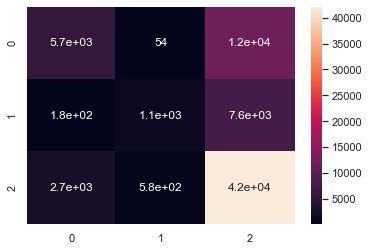

In [50]:
svm.fit(X_train_unigram_tfidf_vec1, y_train)

print(svm.score(X_validate_unigram_tfidf_vec1, y_validation))

from sklearn.metrics import confusion_matrix
y_prediction = svm.predict(X_validate_unigram_tfidf_vec1)
cm=confusion_matrix(y_validation, y_prediction, labels=['Positive','Negative','Neutral'])
print('\n',cm)

sns.heatmap(cm, annot= True)

from sklearn.metrics import classification_report
target_names = ['Positive','Negative','Neutral']
print(classification_report(y_validation, y_prediction, target_names=target_names))

len(unigram_tfidf_vectorizer1.get_feature_names())

0.6702758228181958

 [[ 5523   121 12046]
 [  200  1542  7186]
 [ 3080  1120 41221]]


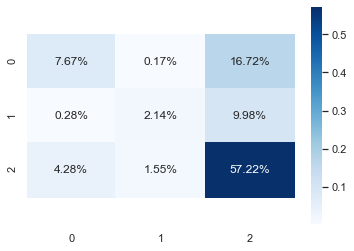

              precision    recall  f1-score   support

    Positive       0.55      0.17      0.26      8928
    Negative       0.68      0.91      0.78     45421
     Neutral       0.63      0.31      0.42     17690

    accuracy                           0.67     72039
   macro avg       0.62      0.46      0.49     72039
weighted avg       0.65      0.67      0.63     72039



In [52]:
import numpy as np
svm.fit(X_train_unigram_count_vec1, y_train)

print(svm.score(X_validate_unigram_count_vec1, y_validation))

from sklearn.metrics import confusion_matrix
y_prediction = svm.predict(X_validate_unigram_count_vec1)
cm=confusion_matrix(y_validation, y_prediction, labels=['Positive','Negative','Neutral'])
print('\n',cm)

sns.heatmap(cm/np.sum(cm),annot = True, fmt='.2%', cmap="Blues")
b, t = plt.ylim() 
b += 0.5 # 
t -= 0.5 # 
plt.ylim(b, t) 
plt.show() 

from sklearn.metrics import classification_report
target_names = ['Positive','Negative','Neutral']
print(classification_report(y_validation, y_prediction, target_names=target_names))

In [53]:
unigram_tfidf_vectorizer2 = TfidfVectorizer(encoding='latin-1', use_idf=True,min_df =1)
X_train_unigram_tfidf_vec2 = unigram_tfidf_vectorizer2.fit_transform(X_train)
X_validate_unigram_tfidf_vec2 = unigram_tfidf_vectorizer2.transform(X_validation)

0.6912366912366913

 [[ 6586    49 11055]
 [  196  1441  7291]
 [ 2849   803 41769]]
              precision    recall  f1-score   support

    Positive       0.63      0.16      0.26      8928
    Negative       0.69      0.92      0.79     45421
     Neutral       0.68      0.37      0.48     17690

    accuracy                           0.69     72039
   macro avg       0.67      0.48      0.51     72039
weighted avg       0.68      0.69      0.65     72039



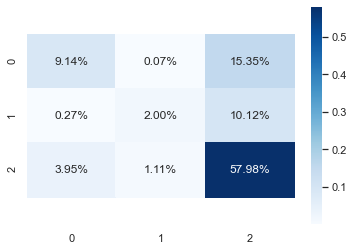

81000

In [54]:
import numpy as np
svm.fit(X_train_unigram_tfidf_vec2, y_train)

print(svm.score(X_validate_unigram_tfidf_vec2, y_validation))

from sklearn.metrics import confusion_matrix
y_prediction = svm.predict(X_validate_unigram_tfidf_vec2)
cm=confusion_matrix(y_validation, y_prediction, labels=['Positive','Negative','Neutral'])
print('\n',cm)


from sklearn.metrics import classification_report
target_names = ['Positive','Negative','Neutral']
print(classification_report(y_validation, y_prediction, target_names=target_names))

sns.heatmap(cm/np.sum(cm),annot = True, fmt='.2%', cmap="Blues")
b, t = plt.ylim() 
b += 0.5 # 
t -= 0.5 # 
plt.ylim(b, t) 
plt.show() 
len(unigram_tfidf_vectorizer2.get_feature_names())

In [55]:
#bigram
bigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True,min_df =1,ngram_range=(1,2))
X_train_bigram_tfidf_vec = bigram_tfidf_vectorizer.fit_transform(X_train)
X_validate_bigram_tfidf_vec = bigram_tfidf_vectorizer.transform(X_validation)

0.7172364968975139

 [[ 7663    27 10000]
 [  117  1840  6971]
 [ 2502   753 42166]]
              precision    recall  f1-score   support

    Positive       0.70      0.21      0.32      8928
    Negative       0.71      0.93      0.81     45421
     Neutral       0.75      0.43      0.55     17690

    accuracy                           0.72     72039
   macro avg       0.72      0.52      0.56     72039
weighted avg       0.72      0.72      0.68     72039



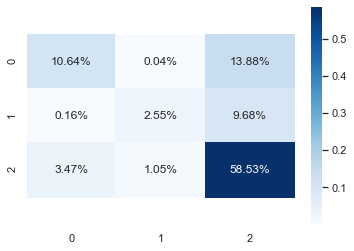

1413032

In [56]:
svm.fit(X_train_bigram_tfidf_vec, y_train)

print(svm.score(X_validate_bigram_tfidf_vec, y_validation))

from sklearn.metrics import confusion_matrix
y_prediction = svm.predict(X_validate_bigram_tfidf_vec)
cm=confusion_matrix(y_validation, y_prediction, labels=['Positive','Negative','Neutral'])
print('\n',cm)


from sklearn.metrics import classification_report
target_names = ['Positive','Negative','Neutral']
print(classification_report(y_validation, y_prediction, target_names=target_names))

sns.heatmap(cm/np.sum(cm),annot = True, fmt='.2%', cmap="Blues")
b, t = plt.ylim() 
b += 0.5 # 
t -= 0.5 # 
plt.ylim(b, t) 
plt.show() 
len(bigram_tfidf_vectorizer.get_feature_names())

In [57]:
#trigram
trigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True,min_df =1,ngram_range=(1,3))
X_train_trigram_tfidf_vec = trigram_tfidf_vectorizer.fit_transform(X_train)
X_validate_trigram_tfidf_vec = trigram_tfidf_vectorizer.transform(X_validation)

0.7211232804453144

 [[ 7746    27  9917]
 [  107  1911  6910]
 [ 2359   770 42292]]
              precision    recall  f1-score   support

    Positive       0.71      0.21      0.33      8928
    Negative       0.72      0.93      0.81     45421
     Neutral       0.76      0.44      0.56     17690

    accuracy                           0.72     72039
   macro avg       0.73      0.53      0.56     72039
weighted avg       0.72      0.72      0.69     72039



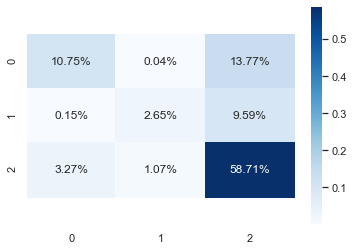

5830349

In [58]:
#Validate the results 

svm.fit(X_train_trigram_tfidf_vec, y_train)

print(svm.score(X_validate_trigram_tfidf_vec, y_validation))

from sklearn.metrics import confusion_matrix
y_prediction = svm.predict(X_validate_trigram_tfidf_vec)
cm=confusion_matrix(y_validation, y_prediction, labels=['Positive','Negative','Neutral'])
print('\n',cm)


from sklearn.metrics import classification_report
target_names = ['Positive','Negative','Neutral']
print(classification_report(y_validation, y_prediction, target_names=target_names))

sns.heatmap(cm/np.sum(cm),annot = True, fmt='.2%', cmap="Blues")
b, t = plt.ylim() 
b += 0.5 # 
t -= 0.5 # 
plt.ylim(b, t) 
plt.show() 
len(trigram_tfidf_vectorizer.get_feature_names())

In [59]:
#bigram
bigram_tfidf_vectorizer1 = TfidfVectorizer(encoding='latin-1', use_idf=True,min_df =1,ngram_range=(3,3))
X_train_bigram_tfidf_vec1 = bigram_tfidf_vectorizer1.fit_transform(X_train)
X_validate_bigram_tfidf_vec1 = bigram_tfidf_vectorizer1.transform(X_validation)

0.6924582517802856

 [[ 5222     5 12463]
 [   33   810  8085]
 [ 1332   237 43852]]
              precision    recall  f1-score   support

    Positive       0.77      0.09      0.16      8928
    Negative       0.68      0.97      0.80     45421
     Neutral       0.79      0.30      0.43     17690

    accuracy                           0.69     72039
   macro avg       0.75      0.45      0.46     72039
weighted avg       0.72      0.69      0.63     72039



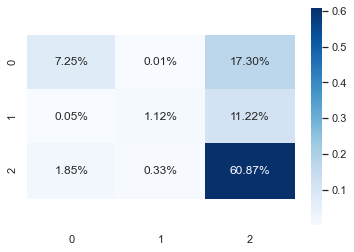

4417317

In [60]:
svm.fit(X_train_bigram_tfidf_vec1, y_train)

print(svm.score(X_validate_bigram_tfidf_vec1, y_validation))

from sklearn.metrics import confusion_matrix
y_prediction = svm.predict(X_validate_bigram_tfidf_vec1)
cm=confusion_matrix(y_validation, y_prediction, labels=['Positive','Negative','Neutral'])
print('\n',cm)


from sklearn.metrics import classification_report
target_names = ['Positive','Negative','Neutral']
print(classification_report(y_validation, y_prediction, target_names=target_names))

sns.heatmap(cm/np.sum(cm),annot = True, fmt='.2%', cmap="Blues")
b, t = plt.ylim() 
b += 0.5 # 
t -= 0.5 # 
plt.ylim(b, t) 
plt.show() 
len(bigram_tfidf_vectorizer1.get_feature_names())

In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10, 100,1000,0.01]}
grid = GridSearchCV(LinearSVC(), param_grid)
grid.fit(X_train_bigram_tfidf_vec, y_train)
print(grid.best_params_) 

C:\Users\tejal\anaconda3\envs\py33\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'C': 1}


In [62]:
grid_predictions = grid.predict(X_validate_bigram_tfidf_vec) 
  
# print classification report 
print(classification_report(y_validation, grid_predictions)) 

              precision    recall  f1-score   support

    Negative       0.69      0.42      0.53      8928
     Neutral       0.76      0.89      0.82     45421
    Positive       0.73      0.55      0.63     17690

    accuracy                           0.75     72039
   macro avg       0.73      0.62      0.66     72039
weighted avg       0.74      0.75      0.74     72039




 [[ 9769   103  7818]
 [  213  3793  4922]
 [ 3452  1580 40389]]


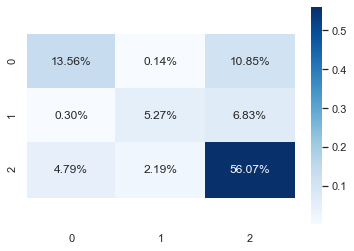

In [63]:
import numpy as np
svm_best = LinearSVC(C=1)
svm_best.fit(X_train_bigram_tfidf_vec, y_train)

y_prediction = svm_best.predict(X_validate_bigram_tfidf_vec)
cm=confusion_matrix(y_validation, y_prediction, labels=['Positive','Negative','Neutral'])
print('\n',cm)

sns.heatmap(cm/np.sum(cm),annot = True, fmt='.2%', cmap="Blues")
b, t = plt.ylim() 
b += 0.5 # 
t -= 0.5 # 
plt.ylim(b, t) 
plt.show() 

In [65]:
feature_ranks = sorted(zip(svm.coef_[0], bigram_tfidf_vectorizer.get_feature_names()))

negative_10 = feature_ranks[-10:]
print("negative words")
for i in range(0, len(negative_10)):
    print(negative_10[i])
print()


positive_10 = feature_ranks[:10]
print("Positive words")
for i in range(0, len(positive_10)):
    print(positive_10[i])
print()

negative words
(0.9079772239368946, 'oozing top')
(0.9265079865727018, 'sick fever')
(0.965734242276066, 'blocker amlopidine')
(0.9866478973223506, 'wonders kept')
(1.0285019412479168, 'larger 80mg')
(1.140360865806633, 'wasn nearly')
(1.2700800581260319, 'scan given')
(1.4452464697430194, 'the mosquito')
(1.8370306751773693, 'scaly and')
(1.8446012469190078, 'scan bottom')

Positive words
(-0.8538722748184829, 'loestrin as')
(-0.7882354870808885, 'c3 and')
(-0.7726820253799539, 'feeeling any')
(-0.7591290057043265, 'effective symax')
(-0.6662923238743222, 'used despite')
(-0.6355180290000332, 'swallowing disintegrates')
(-0.6015408156930679, 'cymbalta sweat')
(-0.571991284764252, 'like pizza')
(-0.5710046486577811, 'cymbalta terribly')
(-0.5506453384936831, 'yards would')

